In [3]:
using Pkg

In [4]:
Pkg.activate("..")

using Distributions
using CairoMakie
using LinearAlgebra
# using XML
using MiCRM_stability


  Activating project at `~/Projects/MiCRM_stability`
Precompiling MiCRM_stability
  ✓ MiCRM_stability
  1 dependency successfully precompiled in 1 seconds. 49 already precompiled.


In [16]:
function get_exponential_parameters(N,M,σ)
    gx = rand(Uniform(σ,2.0)) .+ rand(Uniform(-σ,σ), N)
    gs = rand(Uniform(1,2)) .+ rand(Uniform(-σ,σ), N)
    mx = rand(Uniform(σ,2.0)) .+ rand(Uniform(-σ,σ), N)
    
    fy = ones(N,M)

    λy = zeros(N,M)

    iy = rand(Uniform(σ,2.0)) .+ rand(Uniform(-σ,σ), M)
    oy = rand(Uniform(σ,2.0)) .+ rand(Uniform(-σ,σ), M)

    return MiCRM_stability.exponential_params(gx,gs,mx,fy,λy,iy,oy)
end


function get_real(x::T) where T <: AbstractFloat
    x
end

get_real(x::Complex) = x.re


get_real (generic function with 2 methods)

In [17]:
using Profile

In [18]:
# resource model
N = 100
M = 100
C = 0.5

c = MiCRM_stability.overlap_community(N,M,C,0.99)
p = MiCRM_stability.get_parameters(c, fill(0.9,N), 1.0)
push!(p.tmp, MiCRM_stability.calculate_g_s(p))

J = zeros(N+M,N+M)
@time MiCRM_stability.jacobian!(p,J)


eigen(J)

  0.166620 seconds


Eigen{ComplexF64, ComplexF64, Matrix{ComplexF64}, Vector{ComplexF64}}
values:
200-element Vector{ComplexF64}:
 -1.3787509671451506 + 0.0im
   -1.34338325678732 + 0.0im
 -1.3415978107739854 + 0.0im
 -1.3340025883971989 + 0.0im
 -1.3270465297449914 + 0.0im
 -1.3202445377700045 + 0.0im
 -1.3182178597962784 + 0.0im
 -1.3085941487536676 + 0.0im
 -1.3060803074916933 + 0.0im
 -1.3009979201244761 + 0.0im
 -1.2975408665089723 + 0.0im
 -1.2928930773803535 + 0.0im
 -1.2915403872095206 + 0.0im
                     ⋮
 -0.6440869744705248 + 0.0im
 -0.6432360406224114 + 0.0im
 -0.6420195433789899 + 0.0im
 -0.6420195433789898 + 0.0im
 -0.6420195433789896 + 0.0im
 -0.6420195433789894 + 0.0im
 -0.6405894184643389 + 0.0im
 -0.6391569938086585 + 0.0im
  -0.619596016539038 + 0.0im
 -0.6053327123287598 + 0.0im
 -0.4212728245872528 - 18.275364649693746im
 -0.4212728245872528 + 18.275364649693746im
vectors:
200×200 Matrix{ComplexF64}:
  0.000456187+0.0im   -0.00123784+0.0im  …  0.000128762-0.0367578im
  0.000

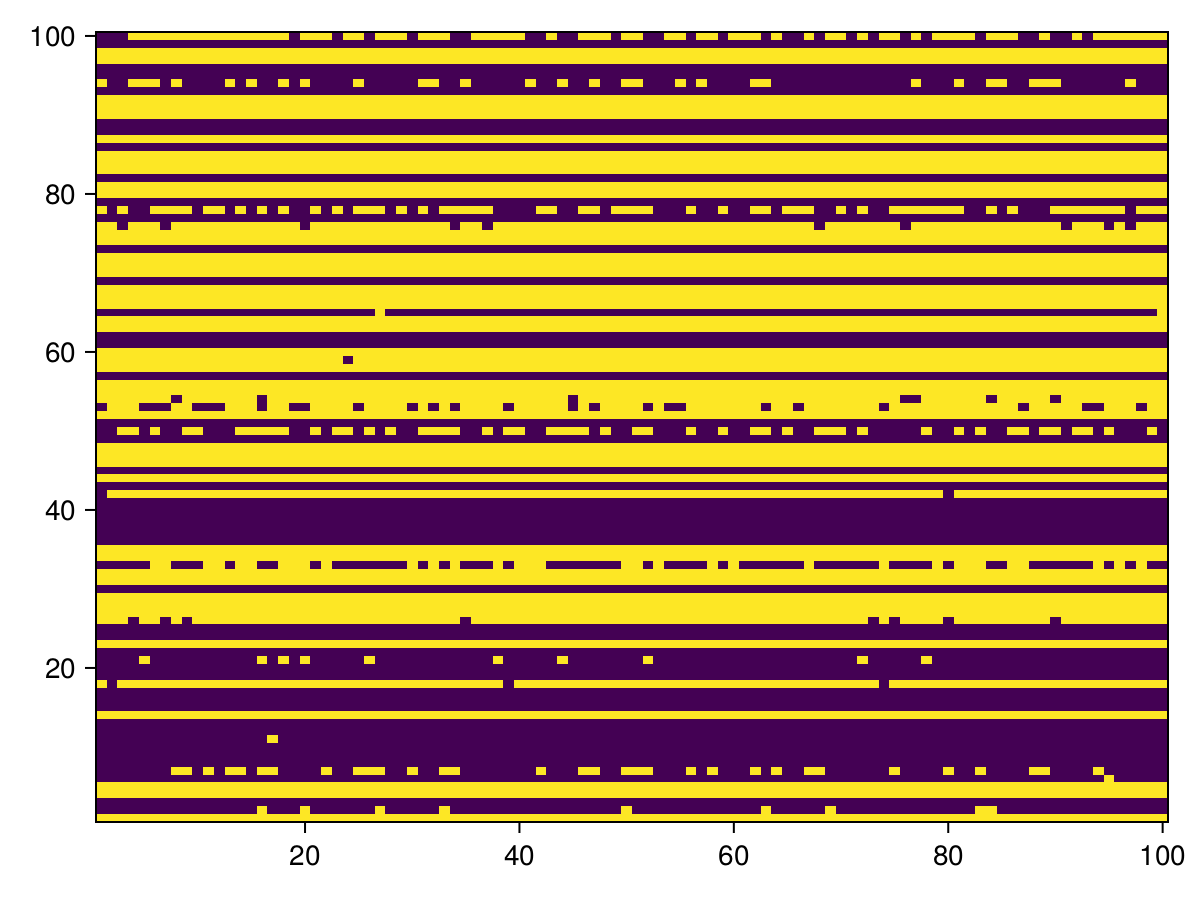

In [15]:
c.U |> plot

In [94]:
N = 100
M = 150
C = 0.5

covar = zeros(N,N)
covar .= 0.0
covar[diagind(covar)] .= 1.0

means = zeros(N)
means .= quantile(Normal(), C)

mv = MultivariateNormal(means,covar)

x = rand(mv,M) .> 0
y = [cor(a,b) for a = eachrow(x), b = eachrow(x)] 

x

100×150 BitMatrix:
 1  1  0  0  0  1  0  0  0  0  0  1  1  …  1  0  1  0  0  0  0  0  0  1  1  1
 0  0  1  1  1  0  1  1  0  1  1  0  0     1  0  0  0  0  0  0  1  0  0  1  1
 0  1  0  0  0  0  1  1  0  1  1  0  1     0  1  0  0  0  1  0  1  0  0  0  0
 0  0  0  1  1  1  0  0  0  0  1  0  0     1  0  0  0  0  0  0  0  1  1  1  1
 0  1  0  1  1  1  0  1  0  0  0  0  0     0  0  0  0  1  0  0  0  0  0  1  0
 1  1  0  1  0  1  0  1  1  0  1  1  0  …  1  1  0  1  1  1  1  1  1  1  0  0
 1  1  0  1  1  0  1  0  0  0  0  0  0     1  0  1  0  0  0  1  0  1  0  0  1
 0  0  1  0  0  0  1  0  1  1  1  0  0     0  1  1  0  0  0  0  0  0  1  1  1
 0  0  0  1  0  1  1  1  0  1  1  1  1     1  1  1  1  1  0  1  0  1  1  1  1
 1  1  0  0  1  0  0  0  1  0  0  1  0     0  1  0  0  0  0  0  0  1  0  1  0
 0  0  1  0  0  0  0  1  1  0  1  0  1  …  1  1  1  1  1  0  0  1  1  0  0  0
 0  1  0  0  0  0  1  0  1  0  1  1  1     1  0  0  1  1  0  0  1  1  0  0  1
 0  0  1  0  1  1  0  0  1  0  1  0  1     1 

In [157]:
#system size
N = 10
M = 10

#consumer values
Λ = 0.5 .+ randn(N)/100

α = zeros(N)
β = zeros(M)

#external supply structure
ρ = zeros(M)
ρ[[1,2]] .= 1.0

σ = zeros(M)
σ[[M-1,M]] .= 1.0

#set supplied resources to 1
β[ρ .== 1] .= 1.0
Itot = sum(β .* ρ)

#prop to mortality
ψ = 0.5
Mtot = Itot * ψ
Otot = Itot * (1-ψ)

β[σ .> 0] .= Otot .* σ[σ .> 0] ./ sum(σ)

β

10-element Vector{Float64}:
 1.0
 1.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.5
 0.5

In [158]:
#provide relative fluxes
χ = Float64.(rand(N,M) .< 0.5)
[χ[i,:] .= χ[i,:] ./ sum(χ[i,:]) for i = 1:N]
χ

10×10 Matrix{Float64}:
 0.166667  0.166667  0.0       0.0       …  0.166667  0.166667  0.166667
 0.0       0.166667  0.0       0.166667     0.166667  0.166667  0.166667
 0.0       0.0       0.0       0.0          0.166667  0.166667  0.166667
 0.2       0.2       0.2       0.0          0.0       0.0       0.0
 0.0       0.2       0.0       0.0          0.0       0.0       0.2
 0.0       0.25      0.0       0.0       …  0.25      0.0       0.0
 0.0       0.0       0.0       0.142857     0.142857  0.142857  0.142857
 0.0       0.0       0.142857  0.142857     0.142857  0.142857  0.142857
 0.142857  0.142857  0.142857  0.142857     0.0       0.142857  0.0
 0.166667  0.0       0.166667  0.0          0.166667  0.166667  0.166667

In [164]:
sum(χ[:,ρ .== 1])

1.8023809523809524

In [163]:
Mtot

1.0

In [280]:
x = zeros(M,200)
x[1,1] = 1.0

for i = 2:200
    x[:,i] = c.D' * (sum(c.U,dims=1)[:] .* x[:,i-1]) 
    x[1,i] = 1
    x[end,i] = 0
    x[:,i] .= x[:,i] / sum(x[:,i]) 
end

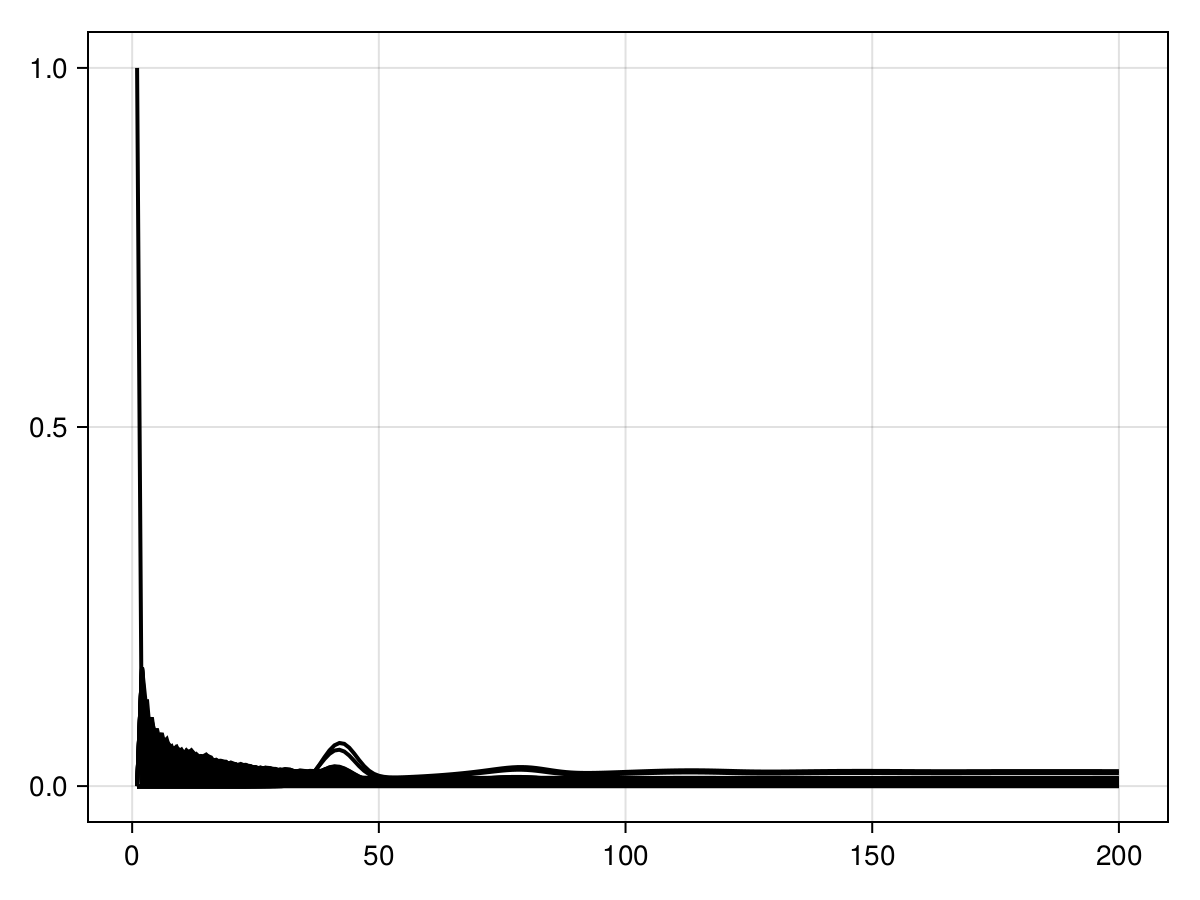

In [281]:
series(x,solid_color = :black)

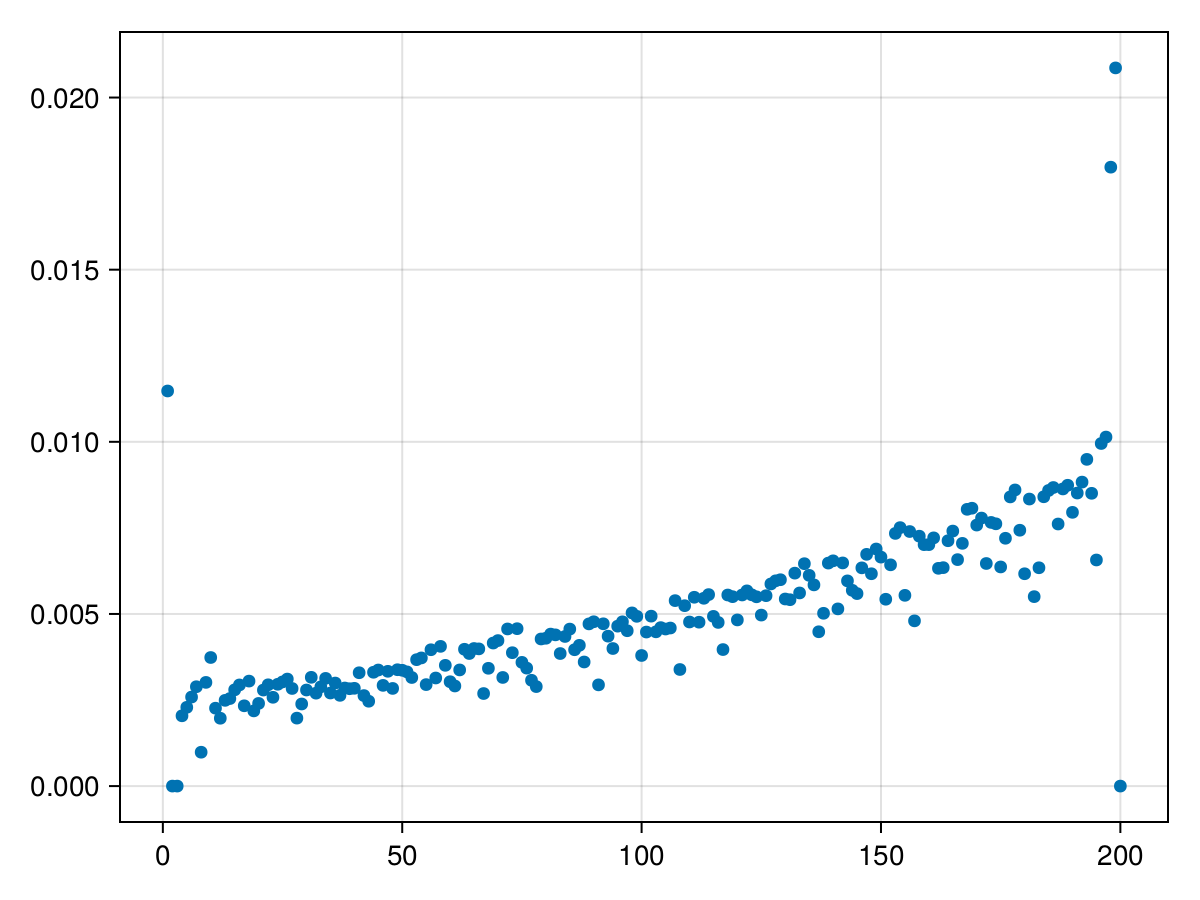

In [282]:
x[:,end] |> plot

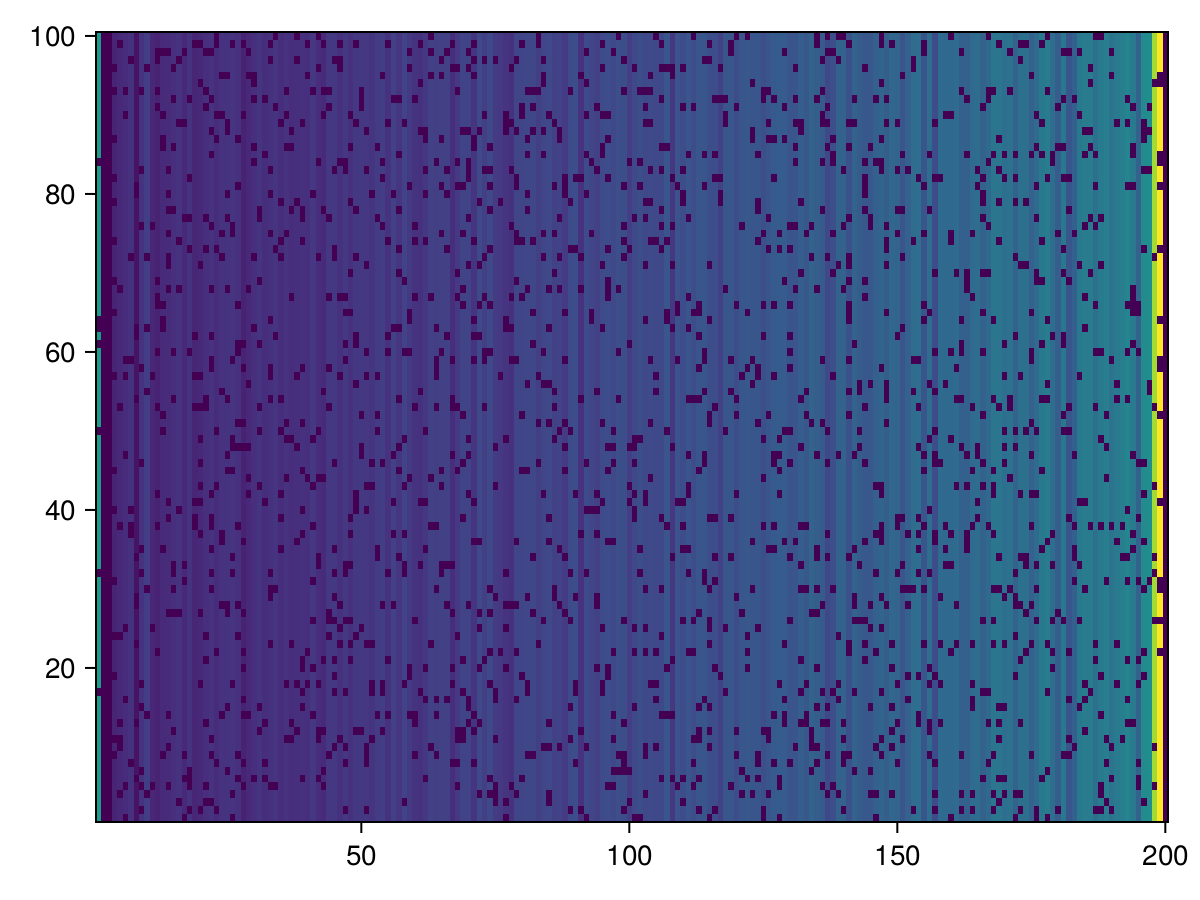

In [289]:
(x[:,end] .* c.U') |> heatmap

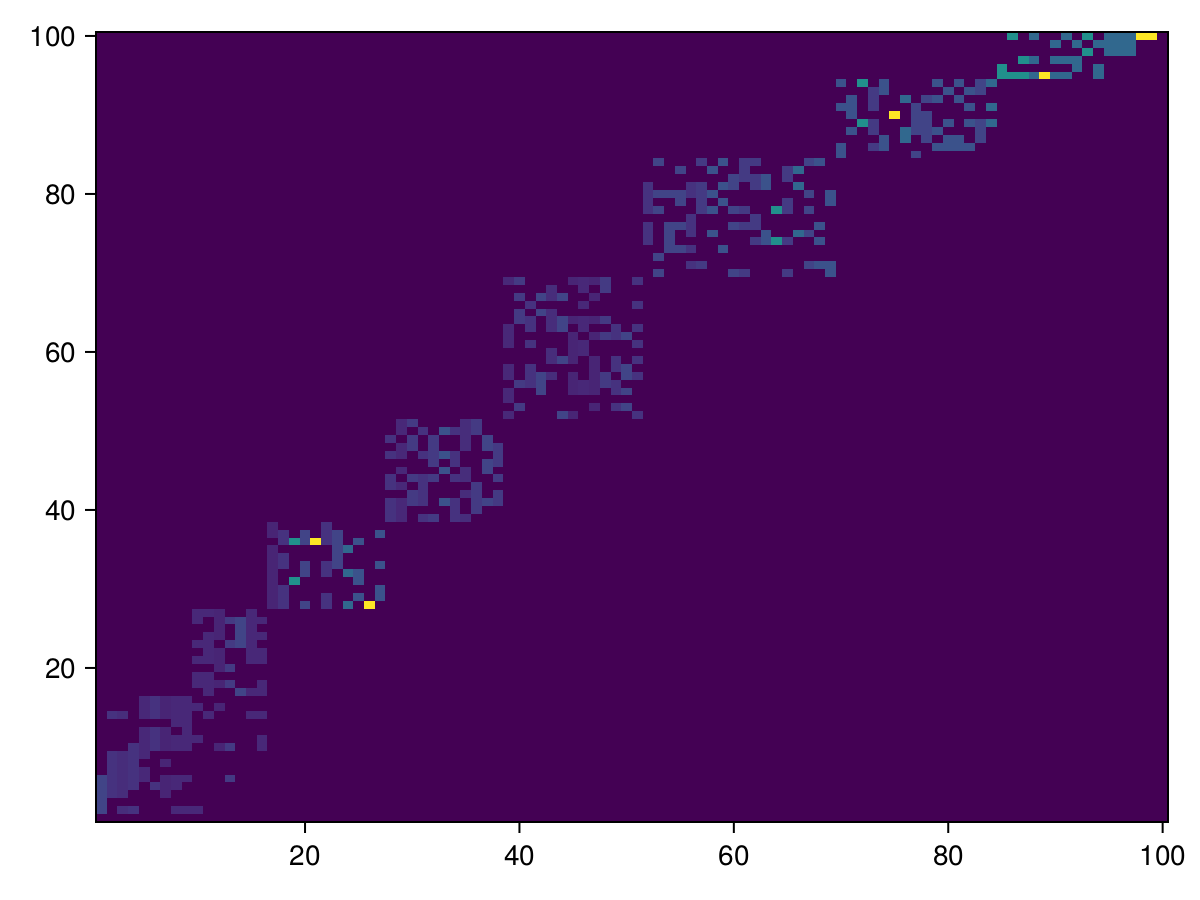

In [300]:
function random_community(N,M,f,C,h,T)
    c = MiCRM_stability.coherent_community(N,M,C, Int(floor(M*C)), h, T)
    Λ = fill(rand(),N)
    
    s = MiCRM_stability.get_structural_params(c.U, c.D, Λ, rand())
    e = f(N,M, 0.1)
    
    p = MiCRM_stability.Parameters(N,M,s,e)

    return(p)
end


N,M,C = 100,100,0.5
c = MiCRM_stability.coherent_community(100,100,C, 5, 1, 0.01)
Λ = fill(rand(),N)
s = MiCRM_stability.get_structural_params(c.U, c.D, Λ, rand())
e = get_exponential_parameters(N,M, 0.1)
    p = MiCRM_stability.Parameters(N,M,s,e)

c.D |> heatmap

In [254]:
#mixed network
U = rand(N,M) ./ (N*M)
    # U[:,end] .= 0  
D = rand(M,M)
# D[:,1] .= 0
[D[i,:] .= D[i,:] ./ sum(D[i,:]) for i = 1:M]

Λ = fill(0.3,N)

#get K matrix
G = sum(U,dims=2)[:]
#uptake branching terms
χ = U ./ (norm.(eachrow(U), 1)) #resources to consumer uptake
γ = U ./ (norm.(eachcol(U), 1)') #consumers to resource loss
#by-product release term
K = G .* Λ .* (χ * D)

#release branching
η = K ./ (norm.(eachcol(K), 1)') #consumers to resource gain

γ[isnan.(γ)] .= 0.0 
η[isnan.(η)] .= 0.0 
χ[isnan.(χ)] .= 0.0 


0-element view(::Vector{Float64}, Int64[]) with eltype Float64

In [133]:
flux = sum(K,dims=1)[:] .- sum(U,dims=1)[:]

100-element Vector{Float64}:
 -0.004245721916000545
 -0.003870246592446851
 -0.0038304042232785852
 -0.0031206690655637987
 -0.003856727211623531
 -0.002951768358553259
 -0.0037584257766328528
 -0.003364769447314399
 -0.003366772689870903
 -0.004224155497242176
 -0.003266268128603164
 -0.0035844398014369576
 -0.0034686540255359022
  ⋮
 -0.0033442133177698733
 -0.003780819888658641
 -0.003506309608678383
 -0.004042164523664088
 -0.003030893836008343
 -0.0035985908615618857
 -0.003372846862670203
 -0.003520527500827029
 -0.004019292654686741
 -0.003407909147063997
 -0.003560892279905057
 -0.0033350295549361853

In [111]:
G .- M .- (G .* Λ)

100-element Vector{Float64}:
 2.168404344971009e-19
 2.168404344971009e-19
 4.336808689942018e-19
 2.168404344971009e-19
 4.336808689942018e-19
 2.168404344971009e-19
 2.168404344971009e-19
 4.336808689942018e-19
 2.168404344971009e-19
 2.168404344971009e-19
 2.168404344971009e-19
 2.168404344971009e-19
 2.168404344971009e-19
 ⋮
 4.336808689942018e-19
 2.168404344971009e-19
 4.336808689942018e-19
 2.168404344971009e-19
 4.336808689942018e-19
 4.336808689942018e-19
 2.168404344971009e-19
 4.336808689942018e-19
 2.168404344971009e-19
 0.0
 4.336808689942018e-19
 2.168404344971009e-19

0.003263710565766941

In [113]:
Apos = Matrix{Float64}(undef,N,N)
Aneg = Matrix{Float64}(undef,N,N)

for i = 1:N, j = 1:N
    int_neg = com.U[i,:] .*  com.U[j,:]
    if sum(int_neg .> 0) != 0
        Aneg[i,j] = mean(int_neg[int_neg .> 0])
    else
        Aneg[i,j] = 0
    end
    
    int_pos = com.U[i,:] .*  com.L[j,:]
    if sum(int_pos .> 0) != 0
        Apos[i,j] = mean(int_pos[int_pos .> 0])
    else
        Apos[i,j] = 0
    end
end

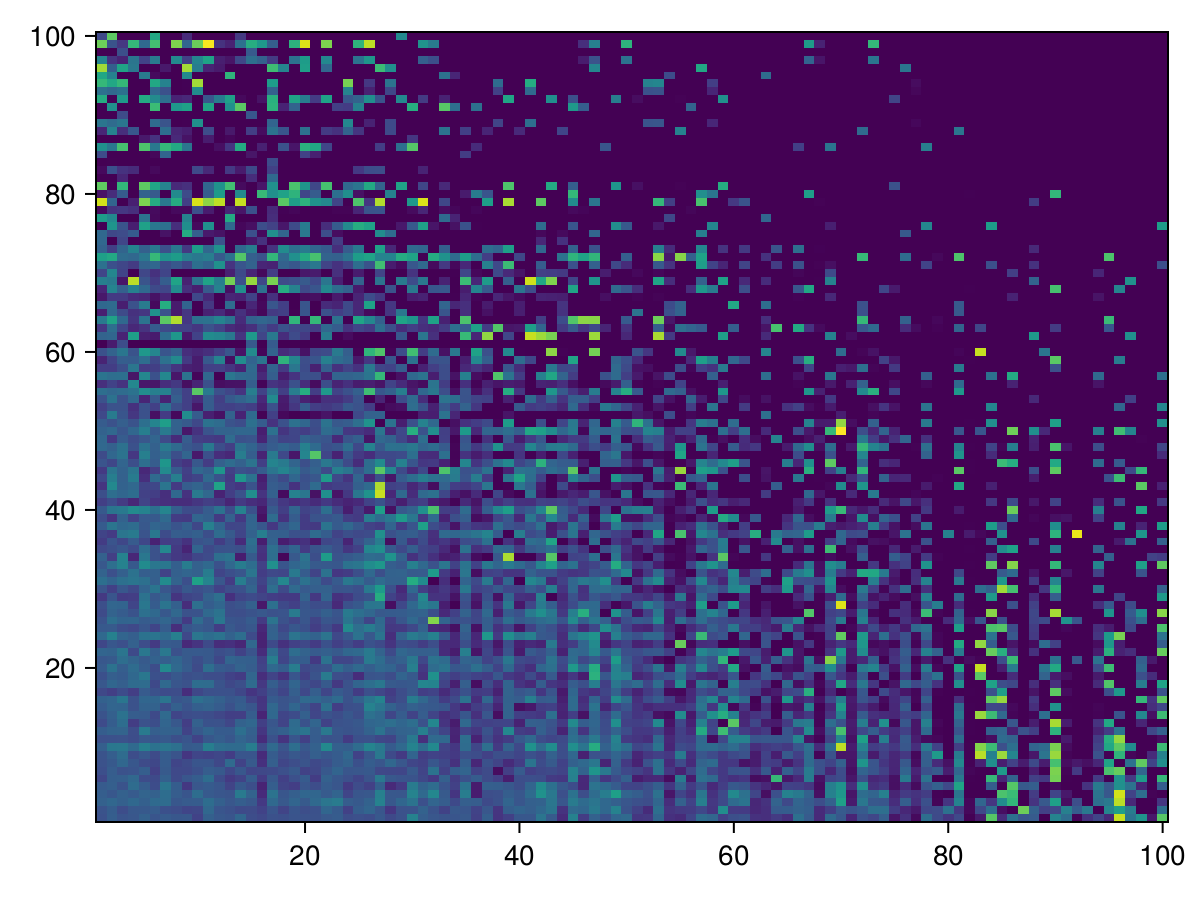

In [115]:
heatmap(Apos)

In [57]:
sum(Aneg) / Ntriples

-0.015563913766668585

In [5]:
# Resources
D = 3
M = 100

c = [rand(D) for i = 1:M]
c = c[sortperm([x[1] for x = c])]

#distance matrix
euclidian_dist(x,y) = sqrt(sum((x .- y).^2))
manhattan_dist(x,y) = sum(abs.(x .- y))

dist = fill(Inf,M,M)
for i = 1:M
    for j = 1:M
        if i == j
            dist[i,j] = Inf
        else
            if sum(c[i]) < sum(c[j])
                dist[i,j] = euclidian_dist(c[i],c[j])
            end
        end
    end
end

heatmap(dist)

LoadError: UndefVarError: `heatmap` not defined

In [6]:
#convert to probabilty
mp = 0.2
d_filter = filter(x -> !isinf(x), dist[:])
l = -log(mp) / mean(d_filter)
p = exp.(-l * dist)
heatmap(p)

LoadError: UndefVarError: `heatmap` not defined

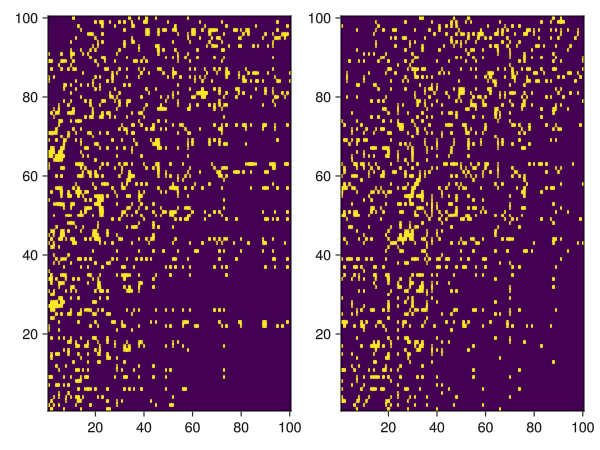

In [211]:
#convert to links
L = rand(M,M) .< p

k = sum(L,dims=1)[:]
f,ax = L[sortperm(k),:] |> heatmap

heatmap!(Axis(f[1,2]), L) 
f

In [166]:
points = Observable(Point2f[randn(2)])

fig, ax = scatter(points)
limits!(ax, -4, 4, -4, 4)

fps = 60
nframes = 120

fig

for i = 1:nframes
    fig
    new_point = Point2f(randn(2))
    points[] = push!(points[], new_point)
    sleep(1/fps) # refreshes the display!
end

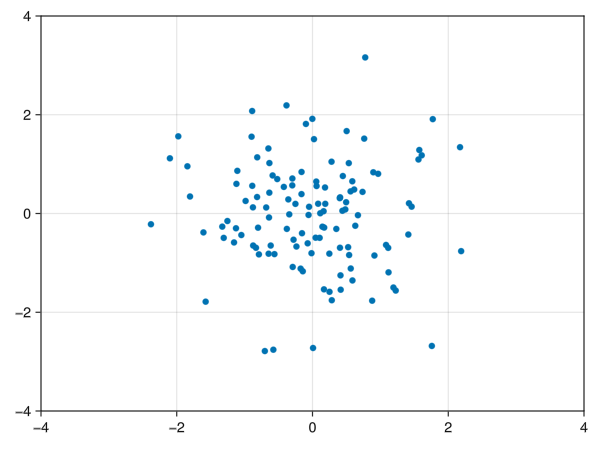

In [163]:
fig

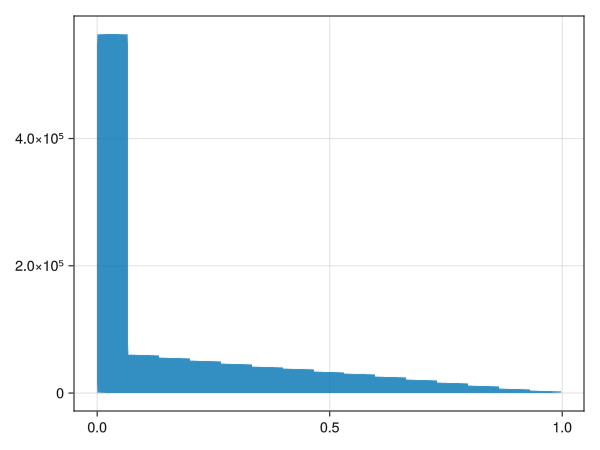

In [11]:
# Distribution of distances
n = rand(1000)

D = zeros(1000,1000)
for i = 1:1000
    for j = 1:1000
        D[i,j] = abs(n[i] - n[j])
    end
end

hist(UpperTriangular(D)[:])

In [12]:
#simulated overlap
function overlap(a,b,c,d)
    a,b,c,d = min.(1,[a,b,c,d])
    a,b,c,d = max.(0,[a,b,c,d])
    #do they overlap
    if (a <= d) & (c >= b)
        return min(c,d) - max(a,b)
    end
    return(0)
end


overlap (generic function with 1 method)

In [13]:
function d_overlap(N, w)
    n1 = rand(N)
    n2 = rand(N)

    c1 = rand(Beta(2,w),N)
    c2 = rand(Beta(2,w),N)



    return overlap.(n1 .- c1, n2 .- c2, n1 .+ c1, n2 .+ c2);

end

d_overlap (generic function with 1 method)

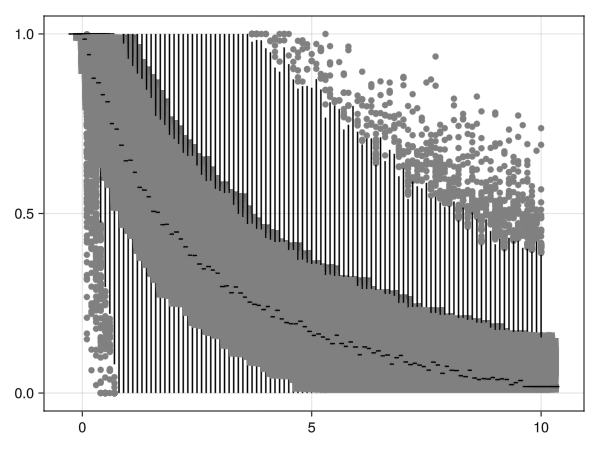

In [14]:
w = collect(0.1:0.1:10.0)
reps = 1000
O = [d_overlap(reps, w) for w = w]

f = Figure()

ax = Axis(f[1,1])

for i = eachindex(w)
    boxplot!(ax, fill(w[i], reps), O[i], color = :grey)
end

f

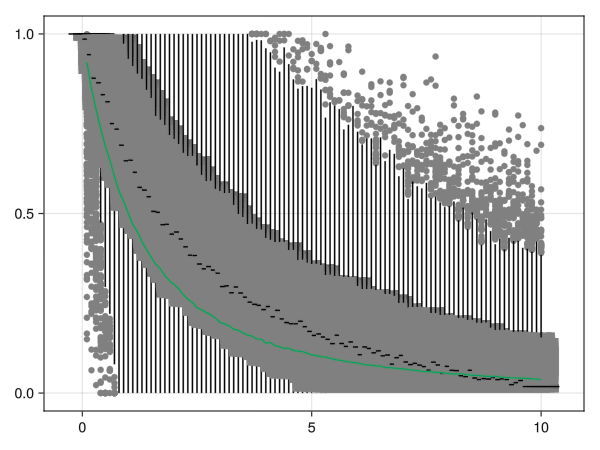

In [15]:
m = mean.([rand(Beta(2,b),10000).^2 for b = w])

lines!(ax, w, m)

# m = mean.([rand(Beta(2,b),10000) for b = w])
lines!(ax, w, m)

# m = mean.([rand(Beta(2,b),10000) for b = w]) .^ 2
lines!(ax, w, m)

f

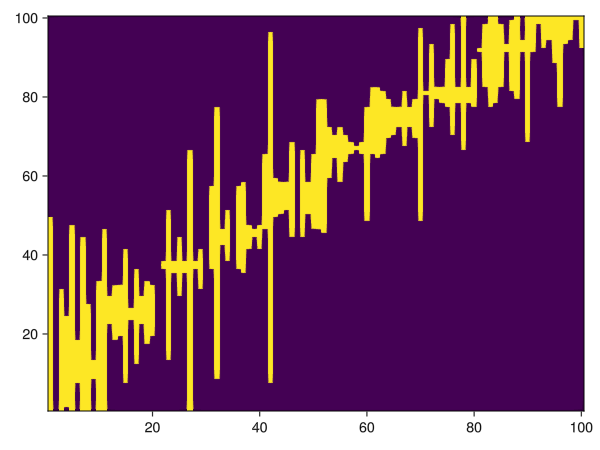

In [77]:
N = 100
M = 100

# n = rand(N) |> sort
d = rand(M) |> sort
n = repeat((1:10)/10, inner=10)

O = 0.01
β = sqrt(1/O) - 1
c = rand(Beta(1, β), N)

#calucate network
A = zeros(N,M)

for i = 1:N
    for j = 1:M
        if (n[i] - c[i] < d[j]) & (n[i] + c[i] > d[j])
            A[i,j] = 1
        end
    end
end

heatmap(A)

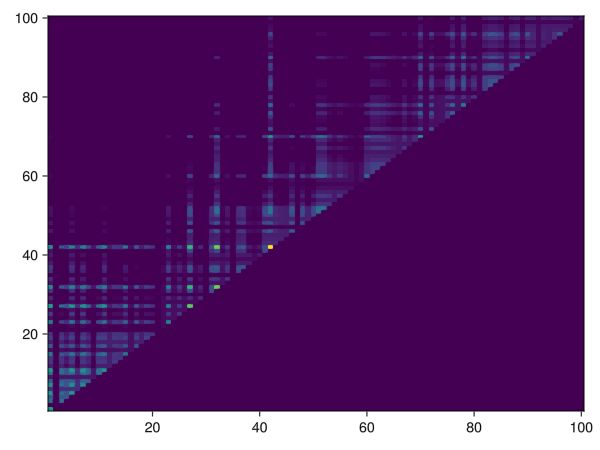

In [78]:
B = zeros(N,N)
for i = 1:N
    for j = i:N
        B[i,j] = mean(A[i,:] .* A[j,:])
    end
end

heatmap(B)

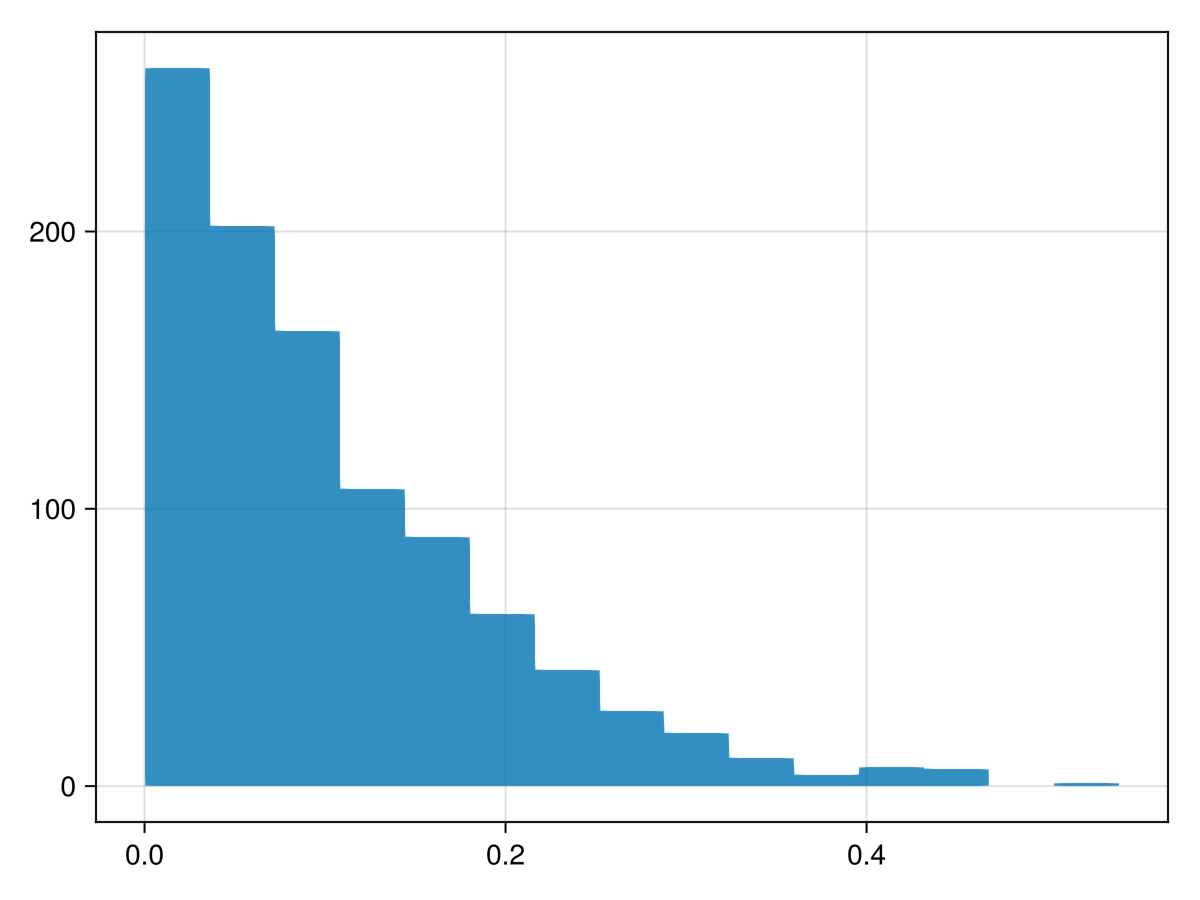

In [76]:
hist(c)